# <font color= 'blue'>EXPLORATORY DATA ANALYSIS ON GLOBAL TERRORISM</font>


## Enoch A. Akinpelu (PhD, CEng, MIChemE)

## Importing important libraries for analysis

In [1]:
# data Wrangling Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data collection

In [2]:
global_t = pd.read_csv('klapeye-global-terrorism.csv')

## Examining the first 5 rows of the data

In [3]:
global_t.head()

DATE      COUNTRY              STATE       CITY           SUBREGION  \
0  2022-11-13       Turkey  Istanbul Province   Istanbul        Western Asia   
1  2022-10-29      Somalia           Banaadir  Mogadishu      Eastern Africa   
2  2022-09-05  Afghanistan              Kabul        NaN       Southern Asia   
3  2022-08-21      Somalia           Banaadir  Mogadishu      Eastern Africa   
4  2022-07-16    Indonesia              Papua        NaN  South-Eastern Asia   

   REGION                          PERPETRATOR  INJURED   DEAD  \
0    Asia       Kurdistan Workers' Party (PKK)     81.0    6.0   
1  Africa                           Al-Shabaab    300.0  121.0   
2    Asia    Islamic State - Khorasan Province     20.0   10.0   
3  Africa                           Al-Shabaab    117.0   21.0   
4    Asia  West Papua National Liberation Army      2.0   10.0   

                                         DESCRIPTION  \
0  A Syrian female placed a bag next to a bench o...   
1  A double car bombing killed at least 121 peopl...   
2  A suicide bomber approached the Russian embass...   
3  Two car bombs exploded at the Hayat Hotel in M...   
4  Around 20 gunmen attacked the village of Nogol...   

                              COORDINATES   CATEGORY  
0                   41.0091982,28.9662187  Explosion  
1                    2.0349312,45.3419183  Explosion  
2                   34.5260109,69.1776838  Explosion  
3                   2.0349312, 45.3419183  Explosion  
4  -4.318185048526521, 138.18016262274278    Assault

## Shape of the data

In [4]:
global_t.shape

(27170, 12)

### <font color= 'red'>We have a total of 27,170 rows and 12 columns in the data</font>

## Check the data colums

In [5]:
global_t.columns

Index(['DATE', 'COUNTRY', 'STATE', 'CITY', 'SUBREGION', 'REGION',
       'PERPETRATOR', 'INJURED', 'DEAD', 'DESCRIPTION', 'COORDINATES',
       'CATEGORY'],
      dtype='object')

## Check for data types

In [6]:
global_t.dtypes

DATE            object
COUNTRY         object
STATE           object
CITY            object
SUBREGION       object
REGION          object
PERPETRATOR     object
INJURED        float64
DEAD           float64
DESCRIPTION     object
COORDINATES     object
CATEGORY        object
dtype: object

### <font color= 'red'>We have 10 object and 2 float data types in the dataset</font>

## Data pre-processing to extract YEAR, MONTH and DAY from DATE column for analysis

In [7]:
# Extract year 
YEAR=global_t['DATE'].apply (lambda s:s.split('-')[0])

# Extract month
MONTH=global_t['DATE'].apply (lambda s:s.split('-')[1])

# Extract day
DAY=global_t['DATE'].apply (lambda s:s.split('-')[2])

In [8]:
# Add extracted year, month and day to the dataframe
global_t['YEAR']=global_t['DATE'].apply (lambda s:s.split('-')[0])
global_t['MONTH']=global_t['DATE'].apply (lambda s:s.split('-')[1])
global_t['DAY']=global_t['DATE'].apply (lambda s:s.split('-')[2])

# Converting data type to numeric values
global_t['YEAR']=pd.to_numeric(global_t['YEAR'])
global_t['MONTH']=pd.to_numeric(global_t['MONTH'])
global_t['DAY']=pd.to_numeric(global_t['DAY'])

## Confirming the inclusion of new columns to the data

In [9]:
global_t.head()

DATE      COUNTRY              STATE       CITY           SUBREGION  \
0  2022-11-13       Turkey  Istanbul Province   Istanbul        Western Asia   
1  2022-10-29      Somalia           Banaadir  Mogadishu      Eastern Africa   
2  2022-09-05  Afghanistan              Kabul        NaN       Southern Asia   
3  2022-08-21      Somalia           Banaadir  Mogadishu      Eastern Africa   
4  2022-07-16    Indonesia              Papua        NaN  South-Eastern Asia   

   REGION                          PERPETRATOR  INJURED   DEAD  \
0    Asia       Kurdistan Workers' Party (PKK)     81.0    6.0   
1  Africa                           Al-Shabaab    300.0  121.0   
2    Asia    Islamic State - Khorasan Province     20.0   10.0   
3  Africa                           Al-Shabaab    117.0   21.0   
4    Asia  West Papua National Liberation Army      2.0   10.0   

                                         DESCRIPTION  \
0  A Syrian female placed a bag next to a bench o...   
1  A double car bombing killed at least 121 peopl...   
2  A suicide bomber approached the Russian embass...   
3  Two car bombs exploded at the Hayat Hotel in M...   
4  Around 20 gunmen attacked the village of Nogol...   

                              COORDINATES   CATEGORY  YEAR  MONTH  DAY  
0                   41.0091982,28.9662187  Explosion  2022     11   13  
1                    2.0349312,45.3419183  Explosion  2022     10   29  
2                   34.5260109,69.1776838  Explosion  2022      9    5  
3                   2.0349312, 45.3419183  Explosion  2022      8   21  
4  -4.318185048526521, 138.18016262274278    Assault  2022      7   16

## Check detailed info of the data

In [10]:
global_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27170 entries, 0 to 27169
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         27170 non-null  object 
 1   COUNTRY      27170 non-null  object 
 2   STATE        15417 non-null  object 
 3   CITY         13130 non-null  object 
 4   SUBREGION    21175 non-null  object 
 5   REGION       21170 non-null  object 
 6   PERPETRATOR  10146 non-null  object 
 7   INJURED      27165 non-null  float64
 8   DEAD         27169 non-null  float64
 9   DESCRIPTION  27170 non-null  object 
 10  COORDINATES  27162 non-null  object 
 11  CATEGORY     21574 non-null  object 
 12  YEAR         27170 non-null  int64  
 13  MONTH        27170 non-null  int64  
 14  DAY          27170 non-null  int64  
dtypes: float64(2), int64(3), object(10)
memory usage: 3.1+ MB


## Count number of missing values

In [11]:
global_t.isna().sum()

DATE               0
COUNTRY            0
STATE          11753
CITY           14040
SUBREGION       5995
REGION          6000
PERPETRATOR    17024
INJURED            5
DEAD               1
DESCRIPTION        0
COORDINATES        8
CATEGORY        5596
YEAR               0
MONTH              0
DAY                0
dtype: int64

## Working on Null values

In [12]:
global_t['REGION'].fillna('Unknown', inplace=True)
global_t['SUBREGION'].fillna('Unknown', inplace=True)
global_t['CITY'].fillna('Unknown', inplace=True)
global_t['STATE'].fillna('Unknown', inplace=True)
global_t['PERPETRATOR'].fillna('Unknown', inplace=True)
global_t['CATEGORY'].fillna('Unknown', inplace=True)

## Confirming no hidden Null values

In [13]:
global_t.isnull().sum()

DATE           0
COUNTRY        0
STATE          0
CITY           0
SUBREGION      0
REGION         0
PERPETRATOR    0
INJURED        5
DEAD           1
DESCRIPTION    0
COORDINATES    8
CATEGORY       0
YEAR           0
MONTH          0
DAY            0
dtype: int64

In [14]:
global_t.fillna(0, inplace=True)

## Check statistical description of the data

In [15]:
global_t.describe()

INJURED          DEAD          YEAR         MONTH           DAY
count  27170.000000  27170.000000  27170.000000  27170.000000  27170.000000
mean       6.248583      3.086897   1999.175451      6.489952     15.750570
std       55.928110     30.247906     10.285051      3.415521      8.825805
min        0.000000      0.000000   1968.000000      1.000000      1.000000
25%        0.000000      0.000000   1996.000000      3.000000      8.000000
50%        0.000000      0.000000   2003.000000      7.000000     16.000000
75%        2.000000      1.000000   2006.000000      9.000000     23.000000
max     5000.000000   2749.000000   2022.000000     12.000000     31.000000

## HeatMap showing correlation analysis of the data

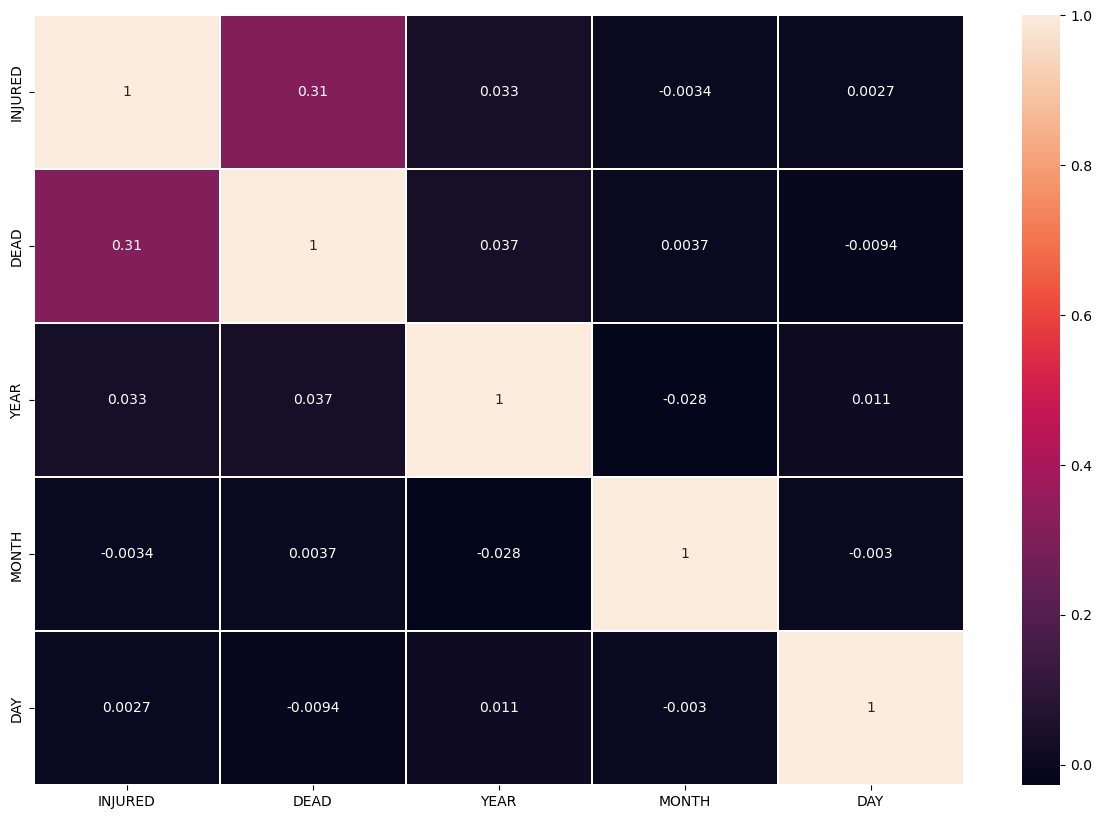

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(global_t.corr(), annot =True, linewidths=.10);

## Visualizing each data distribution in the dataset

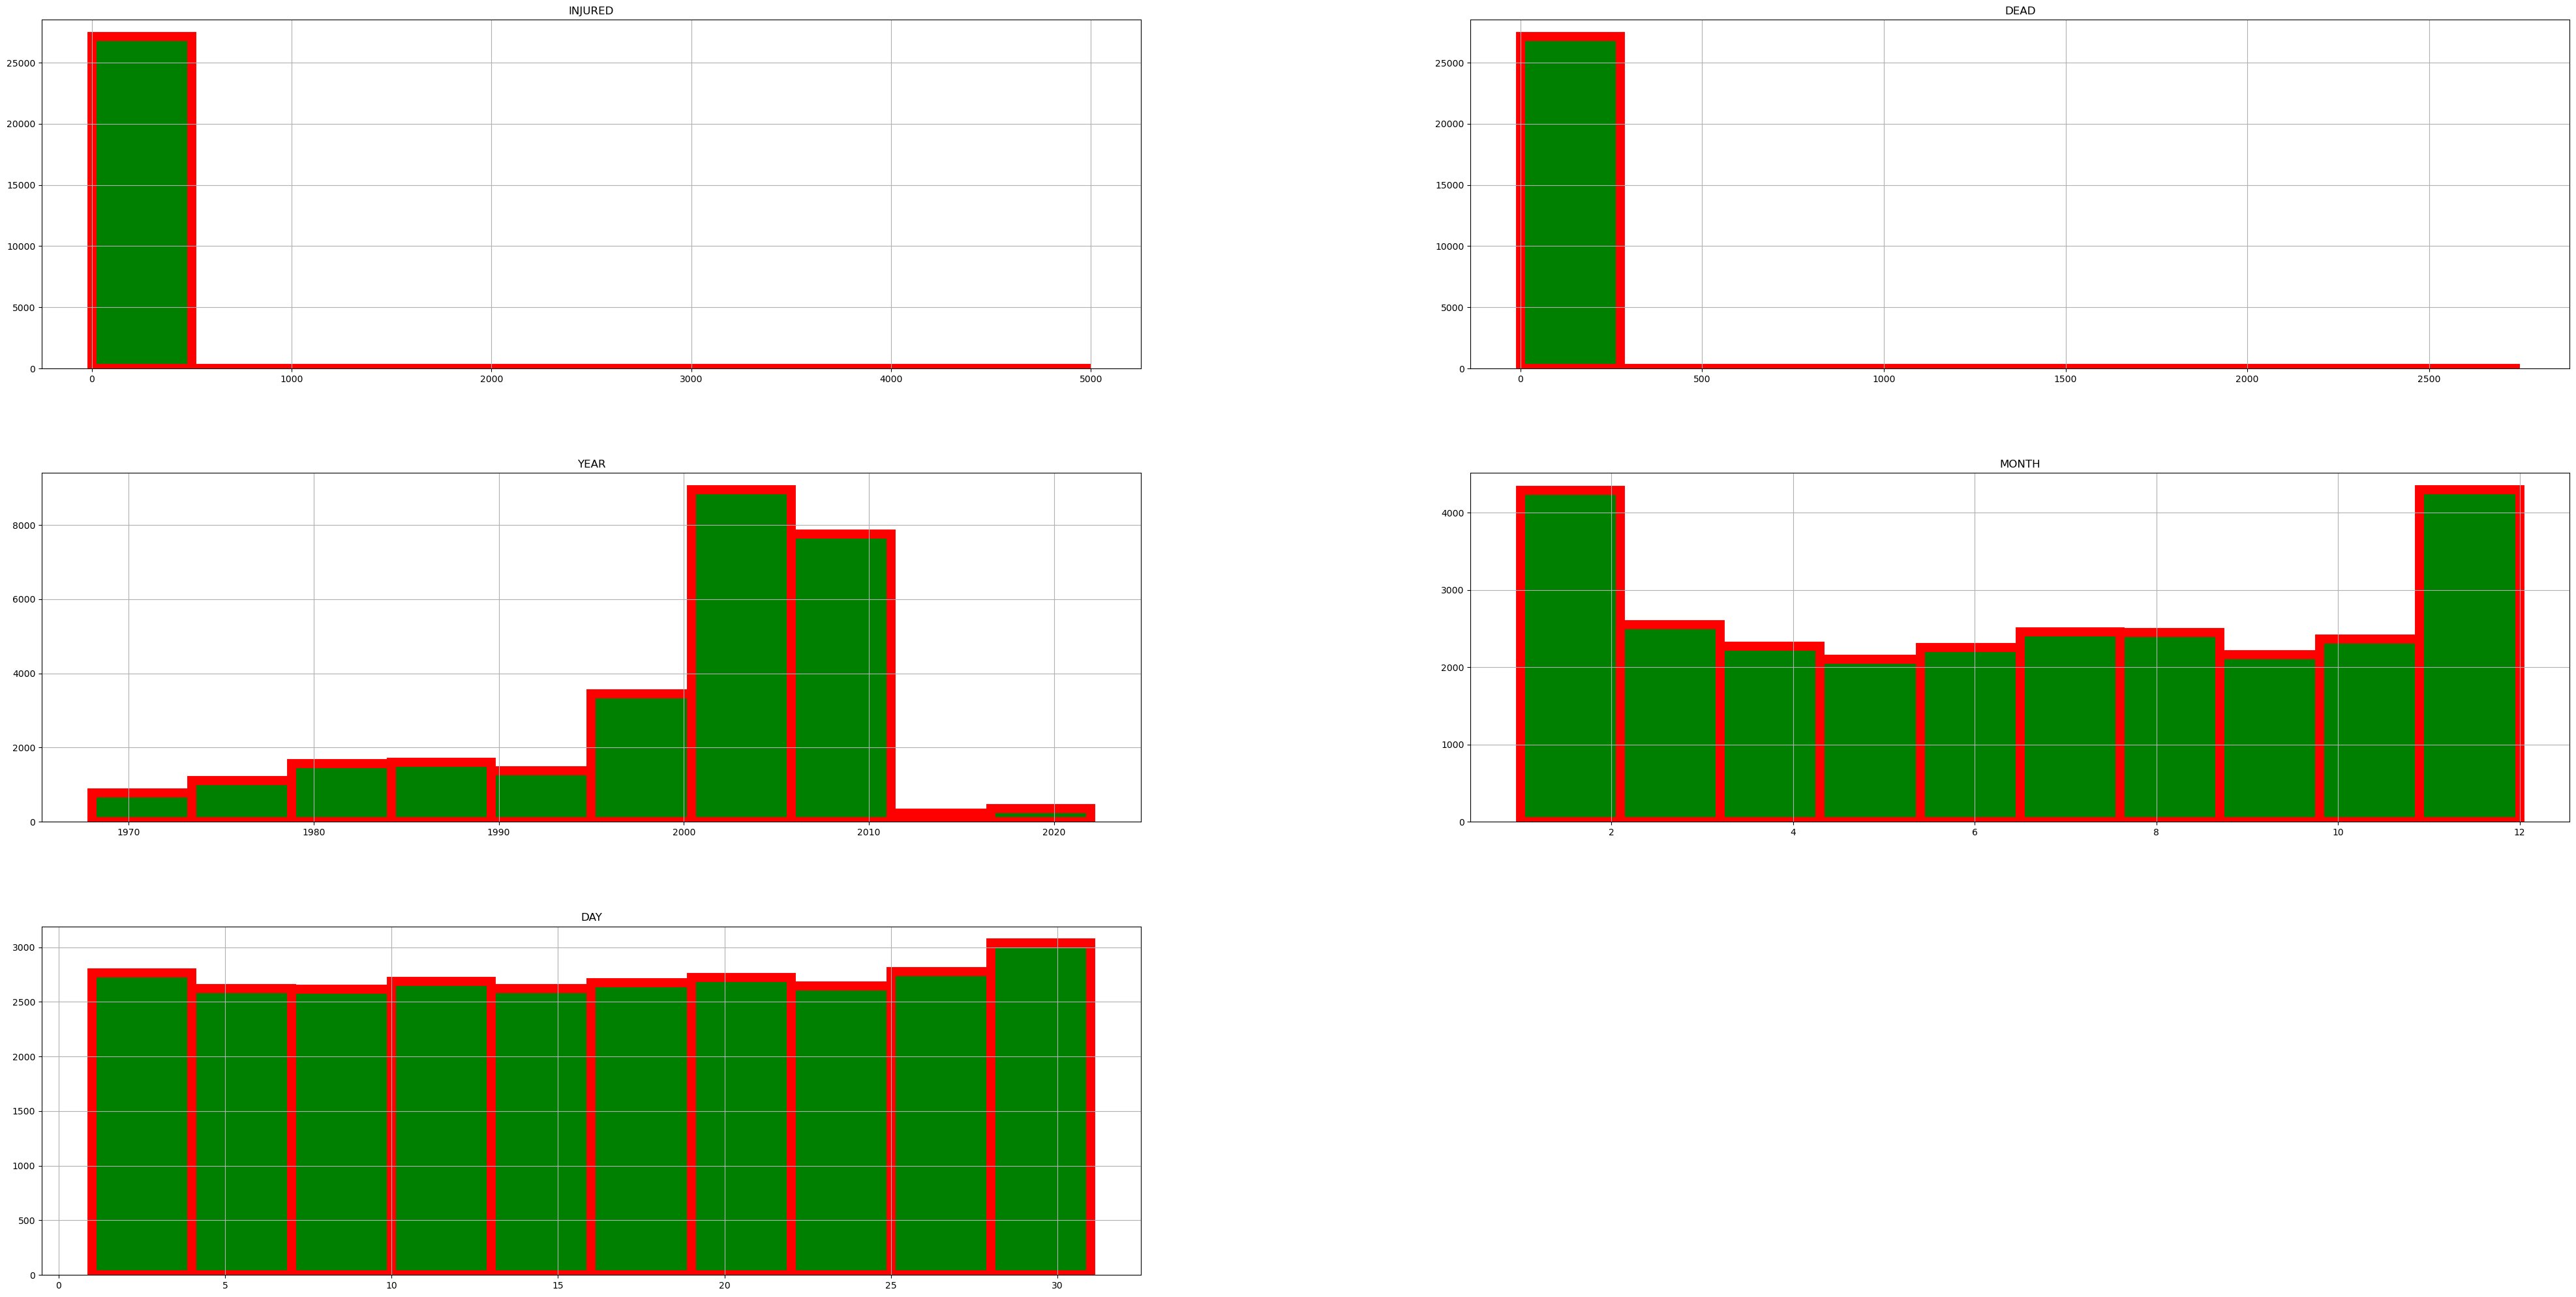

In [17]:
global_t.hist(figsize = (50,25), color = "green", ec="red", lw = 10);

## Countries with highest terrorism

In [18]:
global_t['COUNTRY'].value_counts().head()

Iraq           4235
Afghanistan    1678
Colombia       1522
India          1487
Israel         1214
Name: COUNTRY, dtype: int64

## Number of global terrorist activities for each year

C:\Users\Akinbiyi Akinpelu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


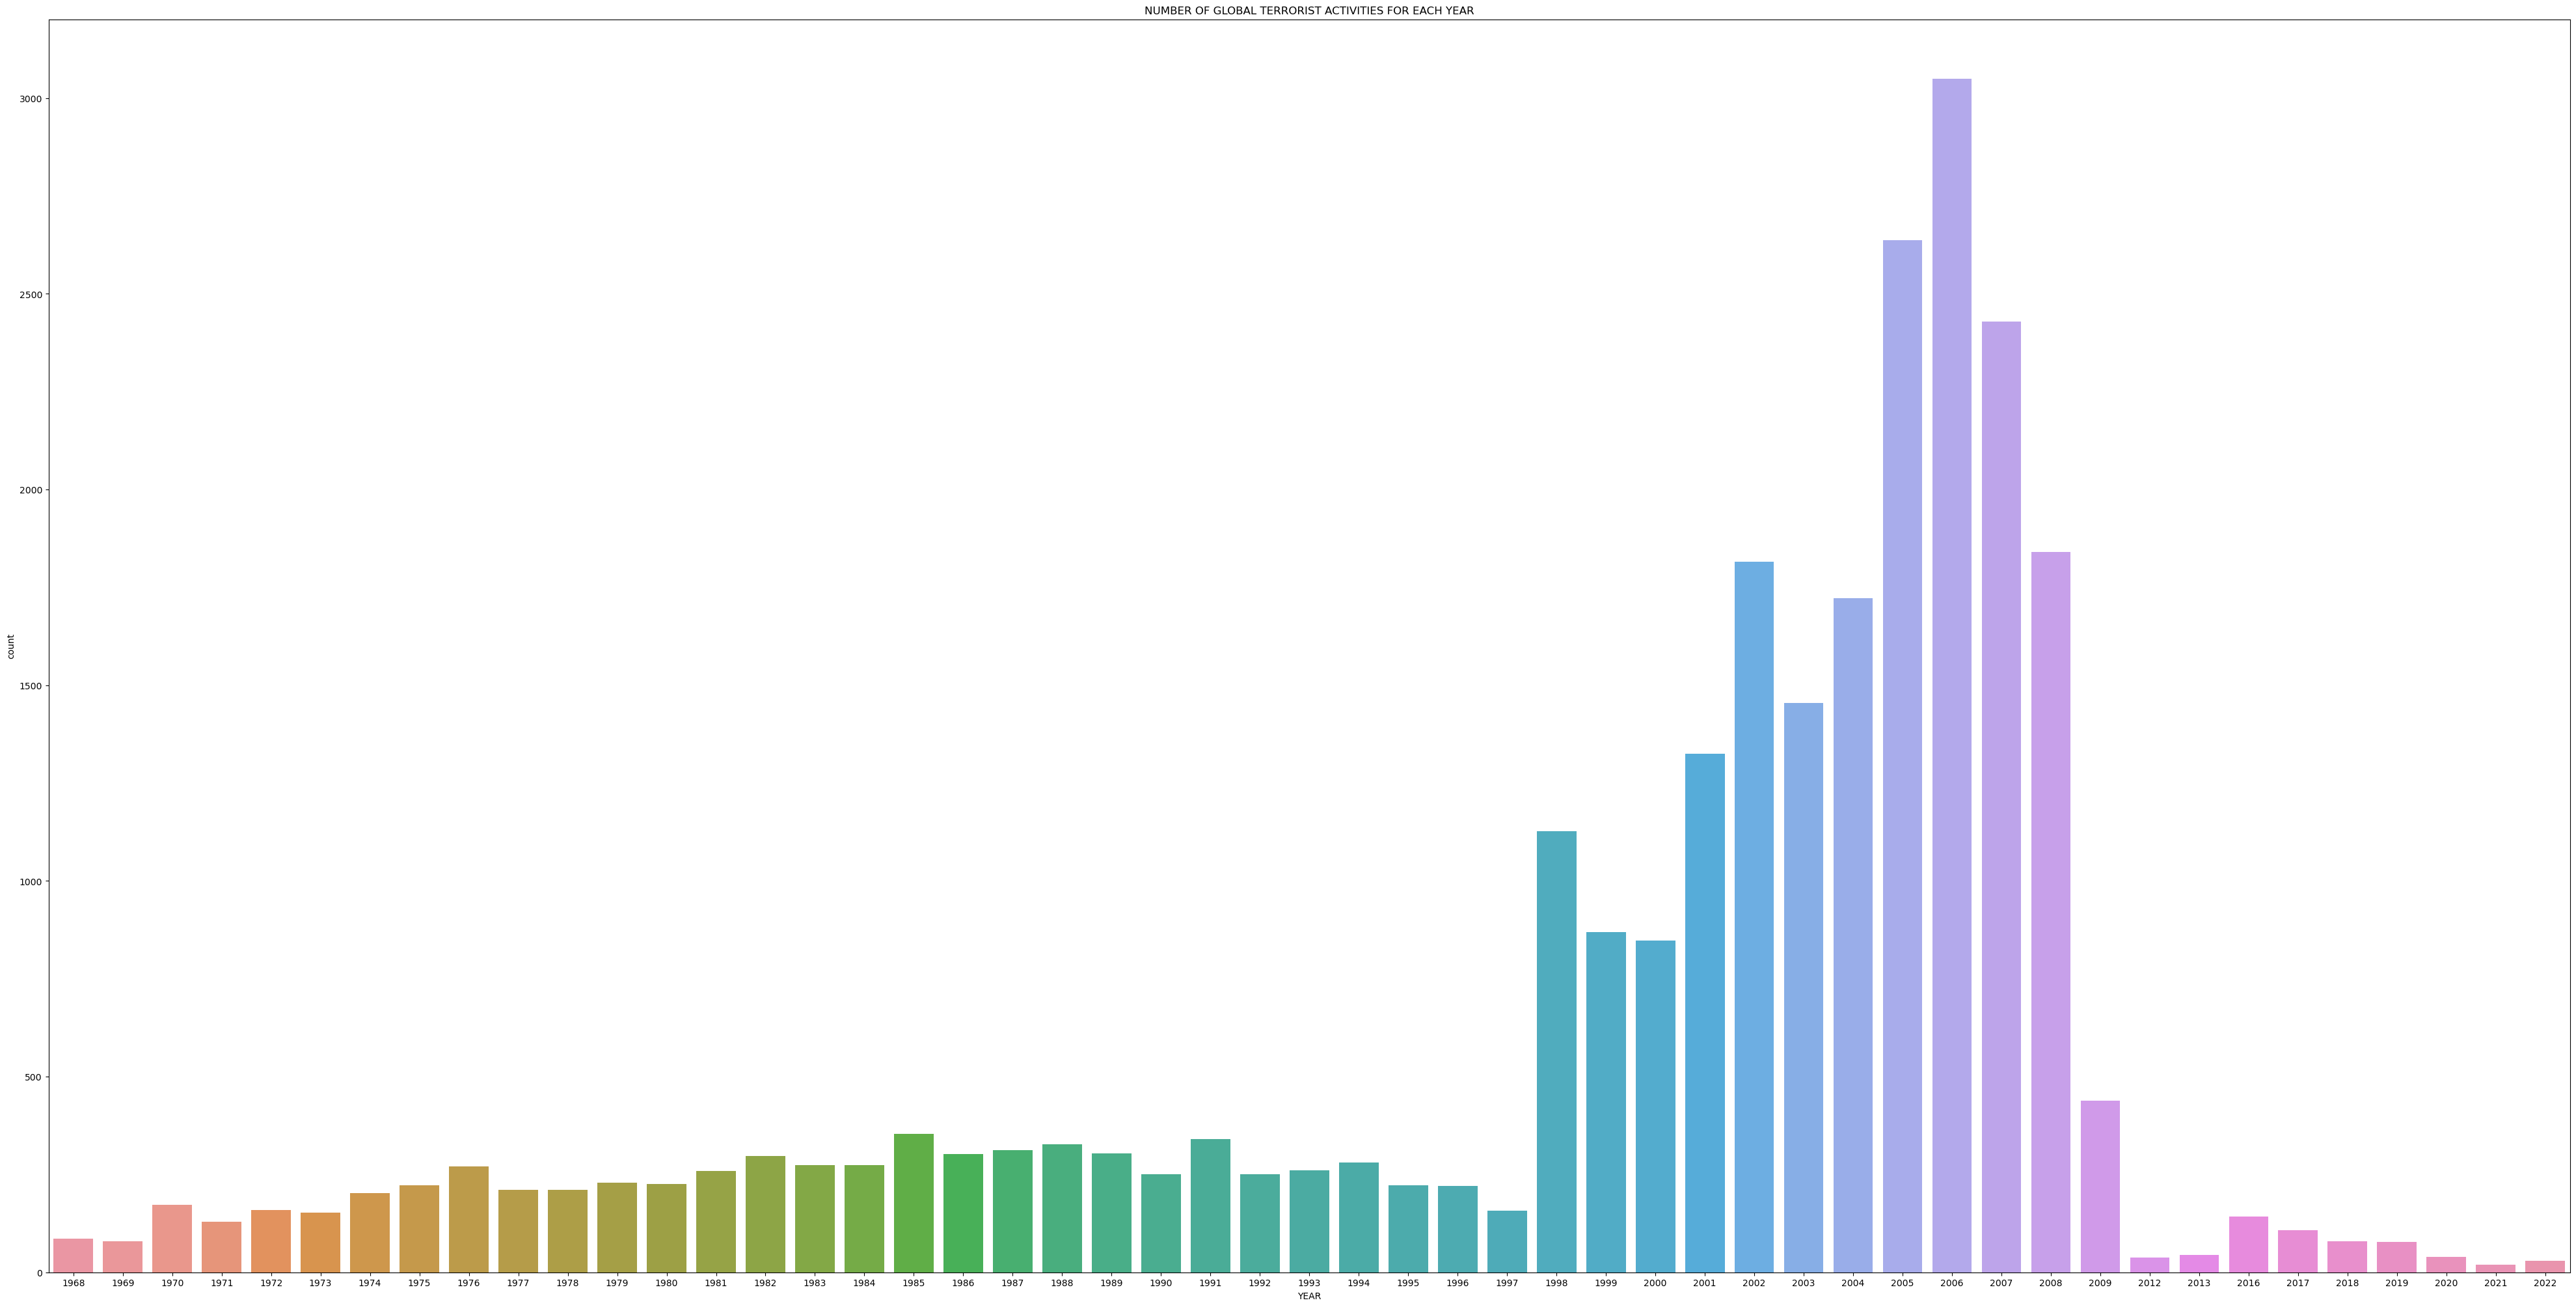

In [19]:
plt.subplots(figsize = (50,25));
sns.countplot("YEAR", data = global_t);
plt.title("NUMBER OF GLOBAL TERRORIST ACTIVITIES FOR EACH YEAR");

### <font color= 'red'>The highest number of terrorist activities occured in the year 2006, while the least occured in the year 2021</font>

## Global terrorist activities by region

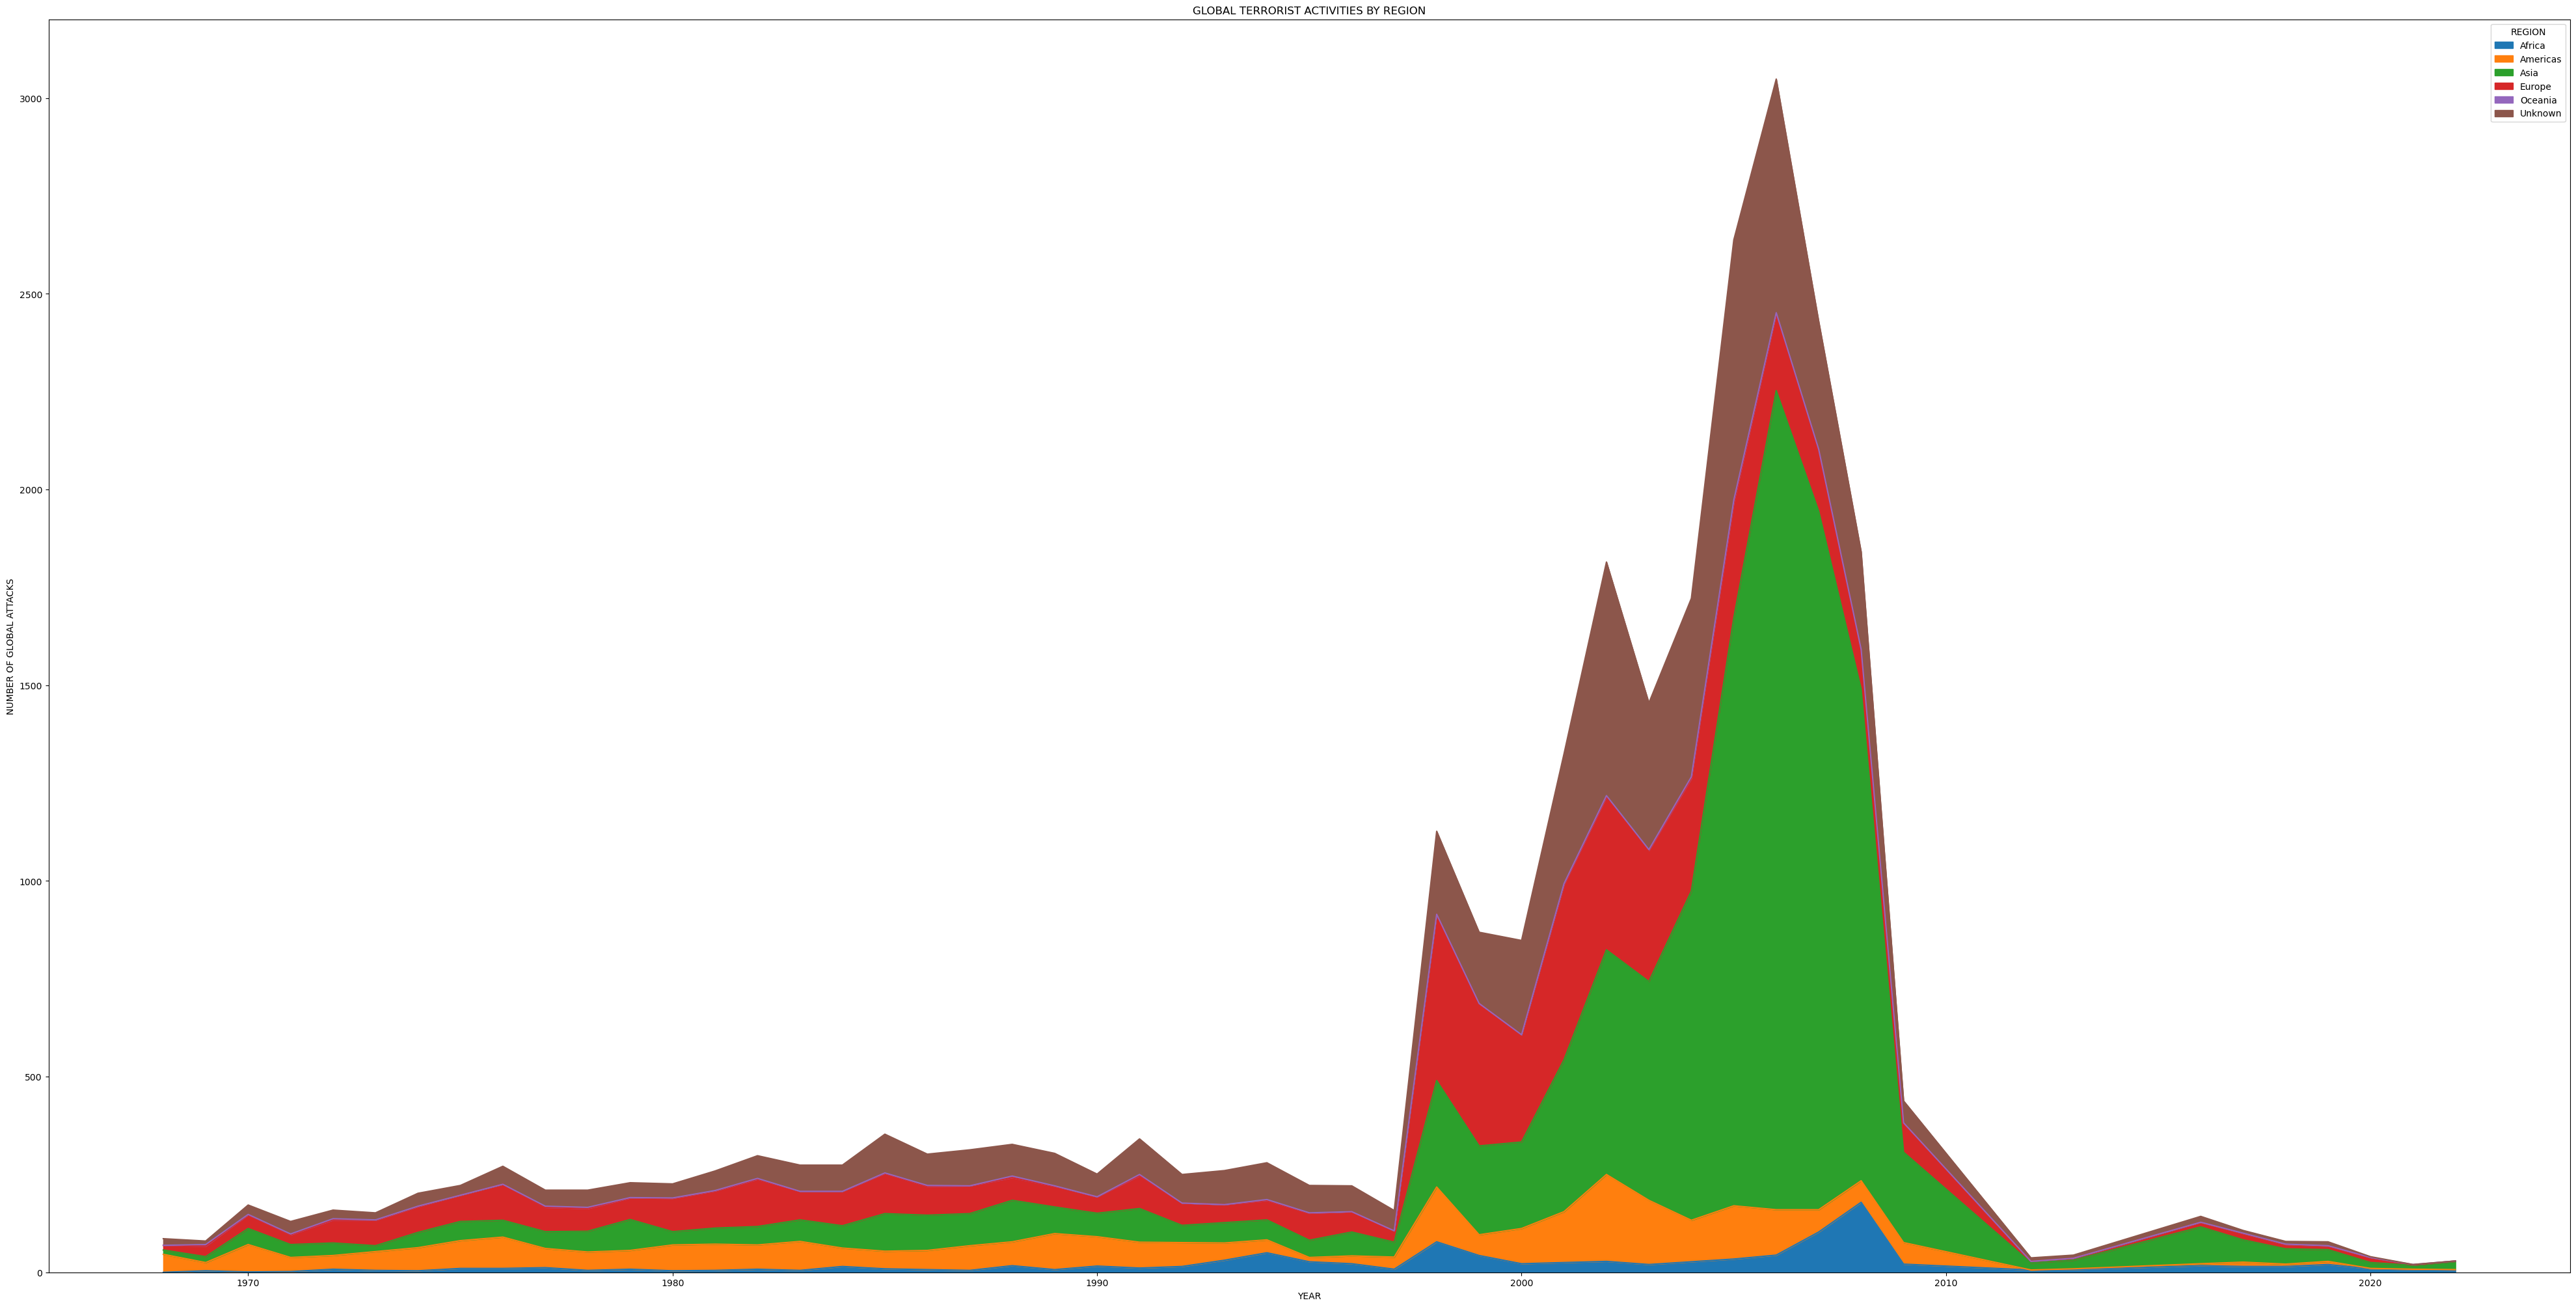

In [20]:
pd.crosstab(global_t.YEAR, global_t.REGION).plot(kind ="area", figsize =(50,25));
plt.title("GLOBAL TERRORIST ACTIVITIES BY REGION");
plt.ylabel("NUMBER OF GLOBAL ATTACKS");

## Countries with highest mortality

In [21]:
global_t.groupby('COUNTRY')['DEAD'].sum().sort_values().tail()

COUNTRY
United States     3517.0
Pakistan          4302.0
India             4372.0
Afghanistan       6062.0
Iraq             23045.0
Name: DEAD, dtype: float64

## Method of attack

C:\Users\Akinbiyi Akinpelu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


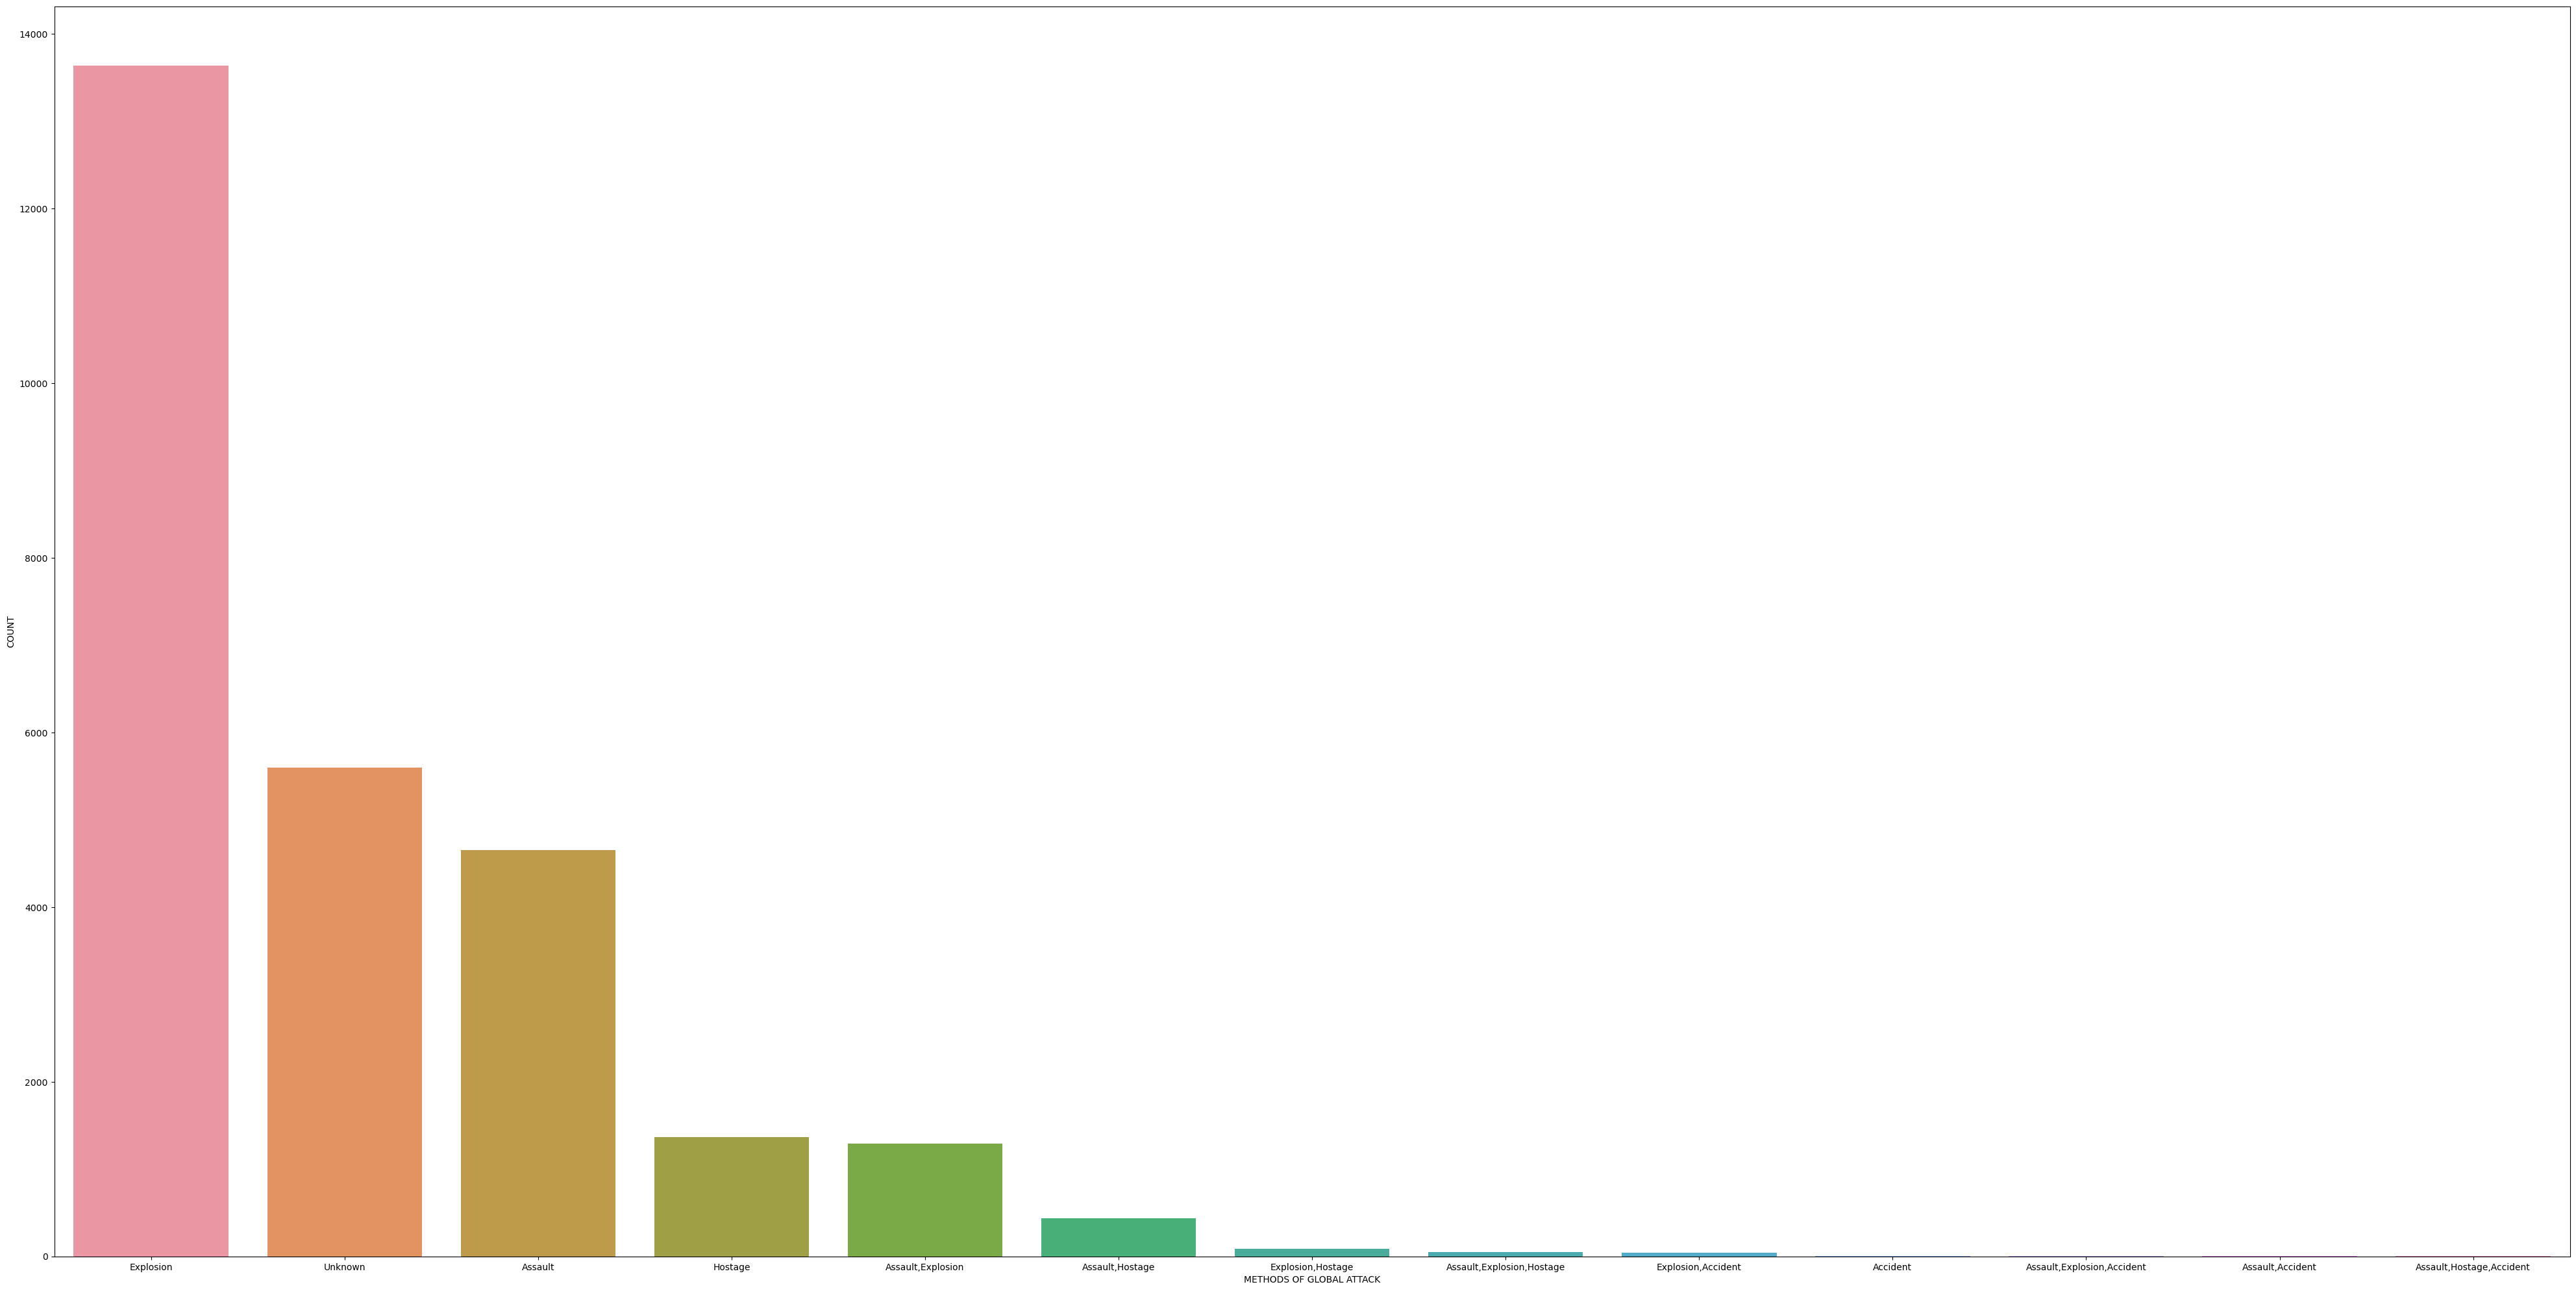

In [22]:
plt.figure(figsize=(50,25))
sns.countplot(global_t["CATEGORY"],order=global_t["CATEGORY"].value_counts().index);
plt.xlabel("METHODS OF GLOBAL ATTACK");
plt.ylabel("COUNT");

### <font color= 'red'>Explosion was the most used method of attack</font>

## Countries with highest number of injury in a year

In [23]:
global_t.groupby(['YEAR','COUNTRY'])['INJURED'].sum().sort_values().tail()

YEAR  COUNTRY
1998  Kenya       5000.0
1995  Japan       5000.0
2005  Iraq        6562.0
2006  Iraq        7729.0
2007  Iraq       11666.0
Name: INJURED, dtype: float64

## Countries with highest number of mortality in a year

In [24]:
global_t.groupby(['YEAR','COUNTRY'])['DEAD'].sum().sort_values().tail()

YEAR  COUNTRY      
2004  Iraq             2111.0
2001  United States    2991.0
2005  Iraq             3641.0
2006  Iraq             4115.0
2007  Iraq             6530.0
Name: DEAD, dtype: float64

### <font color= 'red'>Iraq recorded highest number of injury and mortality in the year 2007</font>

## Number of people injured corresponding to number of people killed globally

In [25]:
import plotly.express as px
px.scatter(global_t,global_t.INJURED,global_t.DEAD, hover_name ="COUNTRY",animation_frame="YEAR",animation_group="COUNTRY",color="CATEGORY",range_color=[0,1],labels={"DEAD","INJURED"},title="Number Of Casualties VS Killed People For Each Year")


## Terrorist group and their operations in each country

In [26]:
global_t['PERPETRATOR'].value_counts()[1:10].values

array([906, 584, 485, 322, 321, 264, 261, 233, 225], dtype=int64)

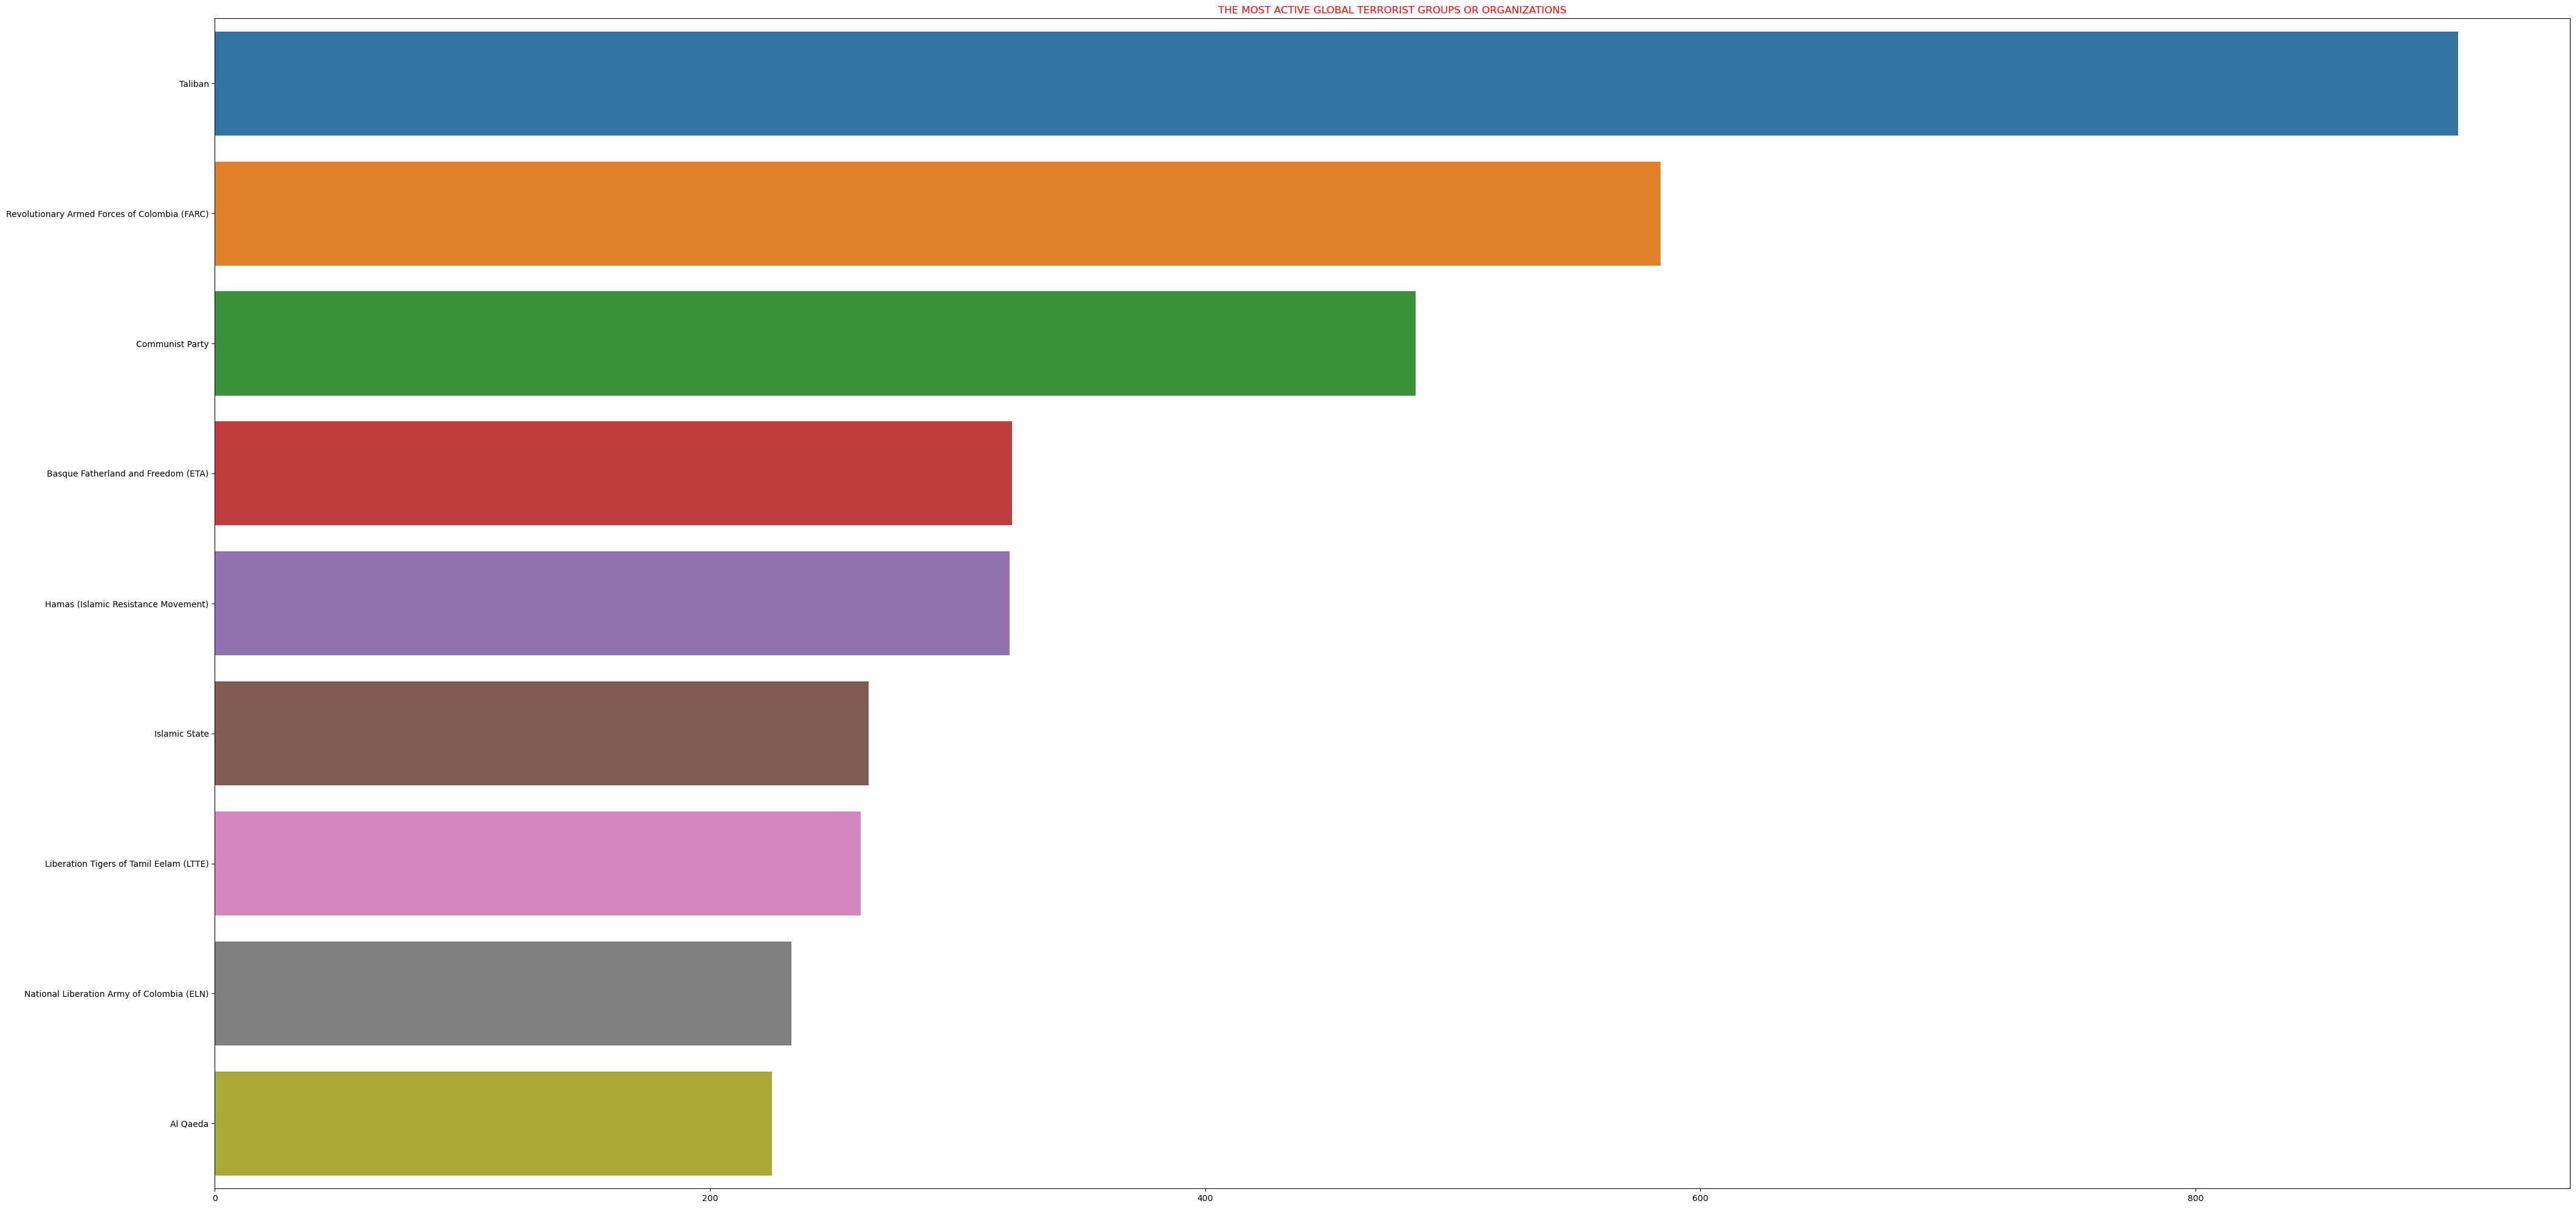

In [27]:
plt.figure(figsize = (50,25))
sns.barplot(y=global_t["PERPETRATOR"].value_counts()[1:10].index, x = global_t["PERPETRATOR"].value_counts()[1:10].values)
plt.title("THE MOST ACTIVE GLOBAL TERRORIST GROUPS OR ORGANIZATIONS", color="red");

## Terrorist attack in each country and subregion 

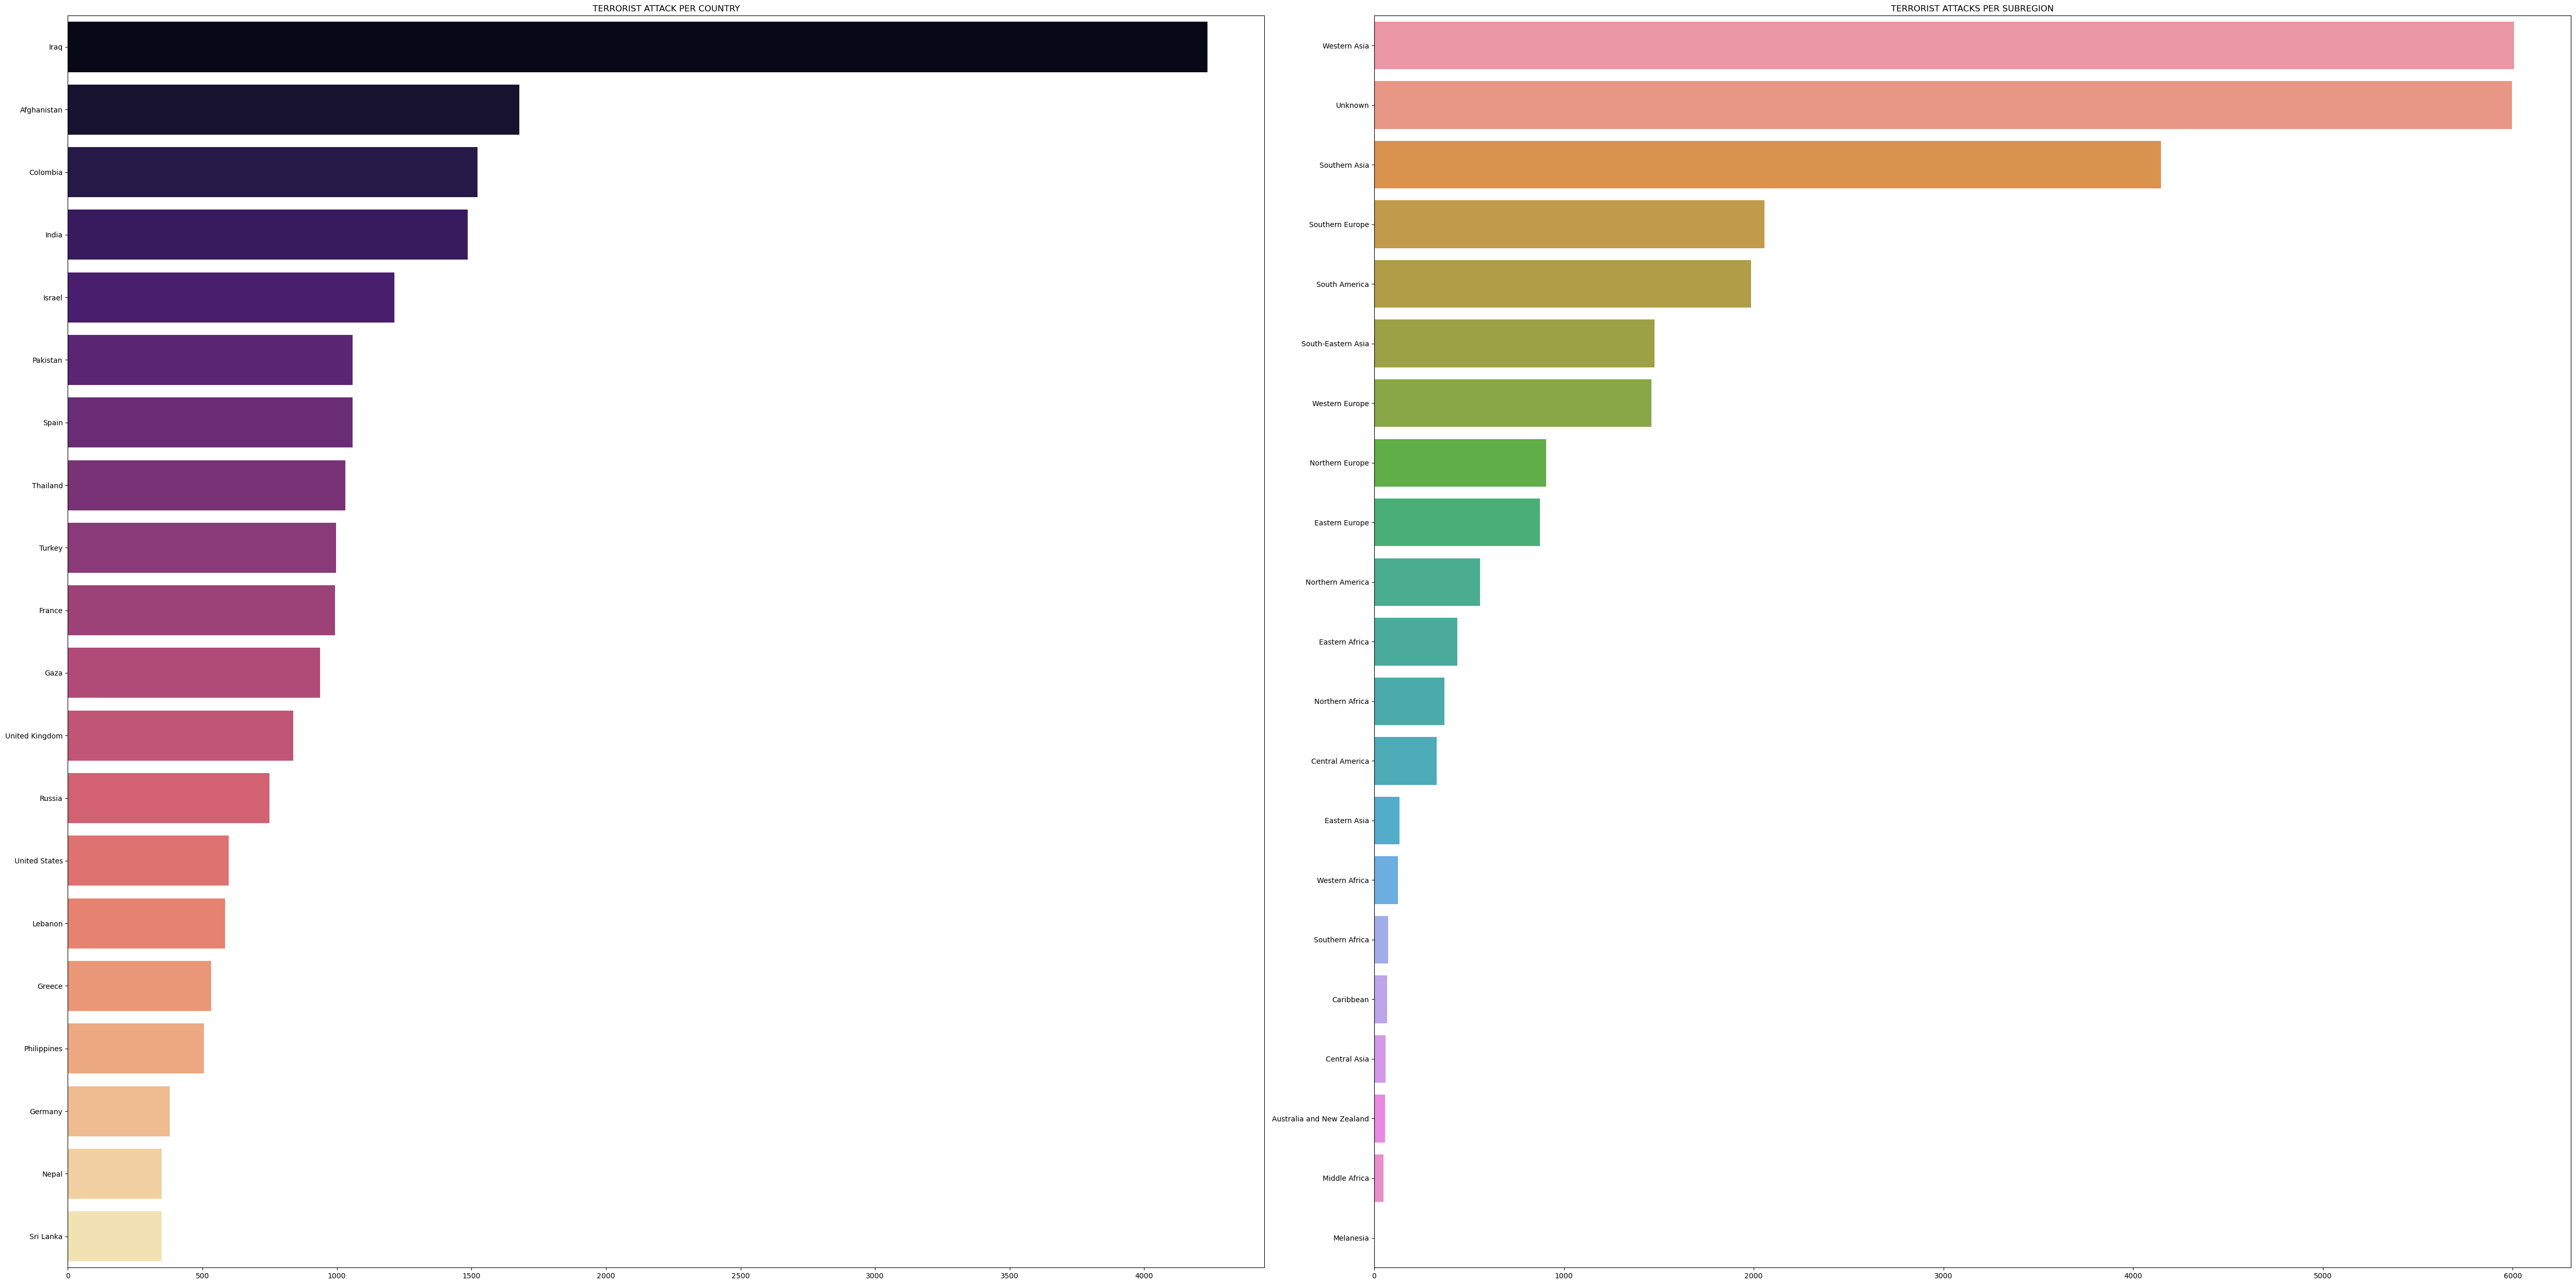

In [28]:
fig, axes = plt.subplots(figsize=(50,25), nrows =1, ncols = 2)
sns.barplot(x=global_t["COUNTRY"].value_counts()[:20].values, y=global_t["COUNTRY"].value_counts()[:20].index, ax=axes[0],palette="magma")
axes[0].set_title("TERRORIST ATTACK PER COUNTRY")
sns.barplot(x=global_t["SUBREGION"].value_counts().values, y = global_t["SUBREGION"].value_counts().index, ax=axes[1])
axes[1].set_title("TERRORIST ATTACKS PER SUBREGION")
fig.tight_layout()
plt.show()

## <font color= 'red'>The terrorist attack was most severe in Iraq and Western Asia.</font>

# Inference

- <font color= 'red'>The countries with the highest terrorism are Iraq, Afghanistan, Colombia, India and Israel.</font>
- <font color= 'red'>Iraq recorded the highest number of injured and dead persons.</font>
- <font color= 'red'>Iraq experienced highest injury and mortality rate in the year 2007.</font>
- <font color= 'red'>The most commonly used weapon of terrorism are the explosives.</font>
- <font color= 'red'>The terrorist attack was most severe in Iraq and Western Asia.</font>
- <font color= 'red'>Taliban carried out most of the terror attack.</font>
- <font color= 'red'>The highest number of terrorist activities occured in the year 2006, while the least occured in the year 2021.</font>